In [1]:
import mysql.connector
import pandas as pd
from tqdm import tqdm
import os
pd.set_option('display.max_columns', None)
mydb = mysql.connector.connect(host="reps-ods-cluster-1.cluster-ro-curqk9xgnt28.us-east-2.rds.amazonaws.com",
  port='3306',
  database ='lobsang',
  user="jaybhatt",
  password="72QmYetSNfGM")

In [2]:
## Getting Distinct vanue names from lobsang
get_sales_query = '''SELECT Date_add(l.datetime, interval -8 hour) "selling_date",
       e.id "event_id",
       l.org_id,
       l.parent_id "listing_id",
       t.foreign_id "ticket_id",
       Date_add(e.datetime, interval -8 hour) as "event_datetime",
       Date_add(e.onsale, interval -8 hour) as "onsale_datetime",
       sg.name "event_type",
       g.name "genre",
       l.type "trans_type",
       v.name "venue",
       v.city "city",
       v.state "state",
       e.name "event_name",
       p.name "performer",
       t.section AS "section",
       t.row AS "row",
       t.seat AS "seat",
       	   	l.amount /
       (
    select Count(*)
    from lobsang.ticket t
    where t.invoice_line_id = l.id
    ) "sell_amt"
       , SB.active_inventory_tags
       , l.cancelled
FROM lobsang.line l
INNER JOIN lobsang.event_link el ON el.foreign_id = l.foreign_event_id AND el.type = 2
INNER JOIN lobsang.event e ON e.id = el.lobsang_id
INNER JOIN lobsang.ticket t ON t.invoice_line_id = l.id
INNER JOIN lobsang.skybox_datamart SB ON SB.event_id = e.id
INNER JOIN lobsang.performer p ON p.id = e.performer_id
INNER JOIN lobsang.genre g ON g.id = p.genre_id
INNER JOIN lobsang.subgenre sg ON sg.id = g.genre_id
INNER JOIN lobsang.venue v ON v.id = e.venue
WHERE l.type = 'invoice' and e.id = 2430601
GROUP BY
        Date_add(l.datetime, interval -8 hour),
       e.id,
       l.org_id,
         l.parent_id,
       t.foreign_id,
       Date_add(e.datetime, interval -8 hour),
       Date_add(e.onsale, interval -8 hour),
       sg.name,
       g.name,
       l.type,
       v.name,
       v.city,
       v.state,
       e.name,
       p.name,
       t.section,
       t.row,
       t.seat,
       l.amount,
       SB.active_inventory_tags,
       l.cancelled'''

sold_df = pd.read_sql(get_sales_query, con=mydb)
sold_df.head(5)

C:\Users\Jay\.conda\envs\bq\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,selling_date,event_id,org_id,listing_id,ticket_id,event_datetime,onsale_datetime,event_type,genre,trans_type,venue,city,state,event_name,performer,section,row,seat,sell_amt,active_inventory_tags,cancelled
0,2021-10-22 13:40:40,2430601,1,2106477,648404351,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,333,M,11,53.35,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0
1,2021-10-22 13:40:40,2430601,1,2106477,648404352,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,333,M,12,53.35,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0
2,2021-10-22 14:14:35,2430601,1,2106538,648423329,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,303,BB,1,51.86,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0
3,2021-10-22 14:14:35,2430601,1,2106538,648423330,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,303,BB,2,51.86,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0
4,2021-10-22 15:38:14,2430601,1,2106711,648424821,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,304,DD,1,51.86,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0


In [3]:
## Getting Distinct vanue names from lobsang
get_purchage_query = '''SELECT Date_add(l.datetime, interval -8 hour) "purchase_date",
       e.id "event_id",
       l.org_id,
       l.parent_id "listing_id",
       t.foreign_id "ticket_id",
       Date_add(e.datetime, interval -8 hour) as "event_datetime",
       Date_add(e.onsale, interval -8 hour) as "onsale_datetime",
       sg.name "event_type",
       g.name "genre",
       l.type "trans_type",
       v.name "venue",
       v.city "city",
       v.state "state",
       e.name "event_name",
       p.name "performer",
       t.section AS "section",
       t.row AS "row",
       t.seat AS "seat",
       l.amount /
    (
    select Count(*)
    from lobsang.ticket t
    where t.invoice_line_id = l.id
    ) "purchase_amt"
       , SB.active_inventory_tags
       , l.cancelled
FROM lobsang.line l
INNER JOIN lobsang.event_link el ON el.foreign_id = l.foreign_event_id AND el.type = 2
INNER JOIN lobsang.event e ON e.id = el.lobsang_id
INNER JOIN lobsang.ticket t ON t.invoice_line_id = l.id
INNER JOIN lobsang.skybox_datamart SB ON SB.event_id = e.id
INNER JOIN lobsang.performer p ON p.id = e.performer_id
INNER JOIN lobsang.genre g ON g.id = p.genre_id
INNER JOIN lobsang.subgenre sg ON sg.id = g.genre_id
INNER JOIN lobsang.venue v ON v.id = e.venue
WHERE l.type = 'invoice' and e.id = 2430601
GROUP BY
        Date_add(l.datetime, interval -8 hour),
       e.id,
       l.org_id,
         l.parent_id,
       t.foreign_id,
       Date_add(e.datetime, interval -8 hour),
       Date_add(e.onsale, interval -8 hour),
       sg.name,
       g.name,
       l.type,
       v.name,
       v.city,
       v.state,
       e.name,
       p.name,
       t.section,
       t.row,
       t.seat,
       l.amount,
       SB.active_inventory_tags,
       l.cancelled'''

purchage_df = pd.read_sql(get_purchage_query, con=mydb)
purchage_df.head(5)

C:\Users\Jay\.conda\envs\bq\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,purchase_date,event_id,org_id,listing_id,ticket_id,event_datetime,onsale_datetime,event_type,genre,trans_type,venue,city,state,event_name,performer,section,row,seat,purchase_amt,active_inventory_tags,cancelled
0,2021-10-22 13:40:40,2430601,1,2106477,648404351,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,333,M,11,53.35,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0
1,2021-10-22 13:40:40,2430601,1,2106477,648404352,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,333,M,12,53.35,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0
2,2021-10-22 14:14:35,2430601,1,2106538,648423329,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,303,BB,1,51.86,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0
3,2021-10-22 14:14:35,2430601,1,2106538,648423330,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,303,BB,2,51.86,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0
4,2021-10-22 15:38:14,2430601,1,2106711,648424821,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,304,DD,1,51.86,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0


In [5]:
test_df = sold_df.merge(purchage_df[['ticket_id','purchase_amt','seat']],on= 'seat')
test_df.head()

,selling_date,event_id,org_id,listing_id,ticket_id_x,event_datetime,onsale_datetime,event_type,genre,trans_type,venue,city,state,event_name,performer,section,row,seat,sell_amt,active_inventory_tags,cancelled,ticket_id_y,purchase_amt
0,2021-10-22 13:40:40,2430601,1,2106477,648404351,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,333,M,11,53.35,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0,648404351,53.35
1,2021-10-22 13:40:40,2430601,1,2106477,648404351,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,333,M,11,53.35,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0,648414742,60.00
2,2021-10-22 13:40:40,2430601,1,2106477,648404351,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,333,M,11,53.35,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0,648420441,60.82
3,2021-10-22 13:40:40,2430601,1,2106477,648404351,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,333,M,11,53.35,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0,691632177,124.83
4,2021-10-22 13:40:40,2430601,1,2106477,648404351,2022-06-14 15:00:00,2021-10-22 06:00:00,Music,Rock,invoice,Raymond James Stadium,Tampa,FL,Coldplay,Coldplay,333,M,11,53.35,"pc,upbeat,oncalljpaulfainsan@reps2.com,brokerg...",0,715252207,176.27


In [6]:
event_date = test_df.event_datetime.dt.date[0]
event_date

datetime.date(2022, 6, 14)

In [7]:
test_df['date'] = test_df.selling_date.dt.date

In [8]:
test_df[['date','event_id','section','row','seat','sell_amt','purchase_amt']]

,date,event_id,section,row,seat,sell_amt,purchase_amt
0,2021-10-22,2430601,333,M,11,53.35,53.35
1,2021-10-22,2430601,333,M,11,53.35,60.00
2,2021-10-22,2430601,333,M,11,53.35,60.82
3,2021-10-22,2430601,333,M,11,53.35,124.83
4,2021-10-22,2430601,333,M,11,53.35,176.27
...,...,...,...,...,...,...,...
147060,2022-05-11,2430601,342,AA,36,91.10,59.60
147061,2022-05-11,2430601,342,AA,36,91.10,81.48
147062,2022-05-11,2430601,342,AA,36,91.10,91.10
147063,2022-03-18,2430601,342,DD,37,59.60,59.60


In [9]:
f_df = test_df.groupby('date').count()[['event_id']].join(test_df.groupby('date').mean()[['sell_amt','purchase_amt']])

In [10]:
f_df = f_df.rename(columns ={'event_id':'no tickets sol'})

In [11]:
f_df['Ratio'] = f_df['sell_amt']/f_df['purchase_amt']

In [12]:
f_df['no tickets sol * Ratio']= f_df['no tickets sol']*f_df['Ratio']

In [13]:
f_df['norm_ratio'] = f_df['no tickets sol * Ratio']/f_df['no tickets sol * Ratio'].sum()

In [14]:
f_df['norm_ratio_cum_sum'] = f_df['norm_ratio'].cumsum()

In [15]:
f_df['norm_ratio*1000'] = f_df['norm_ratio']*1000

In [16]:
f_df['no tickets sol_cumsum'] = f_df['no tickets sol'].cumsum()

In [17]:
f_df['actual_cumsum_ratio']=f_df['no tickets sol_cumsum']/f_df['no tickets sol'].sum()

<AxesSubplot:xlabel='date'>

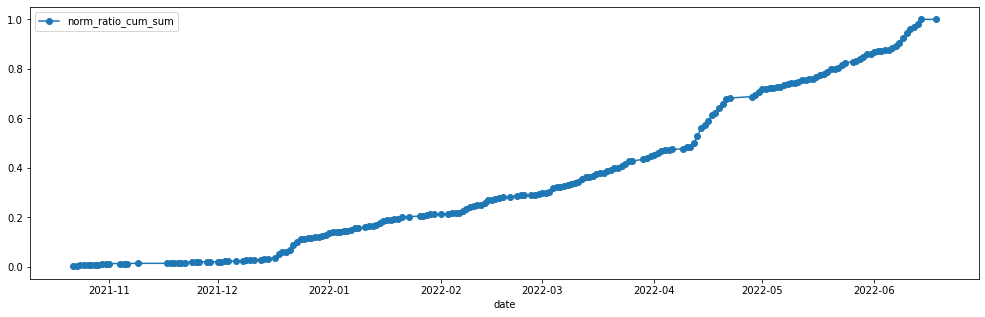

In [19]:
f_df[['norm_ratio_cum_sum']].plot(figsize=(17,5),marker = 'o')

In [20]:
f_df.to_csv("analysis.csv")

In [21]:
f_df['DTE'] = f_df.index-event_date 

<AxesSubplot:xlabel='DTE'>

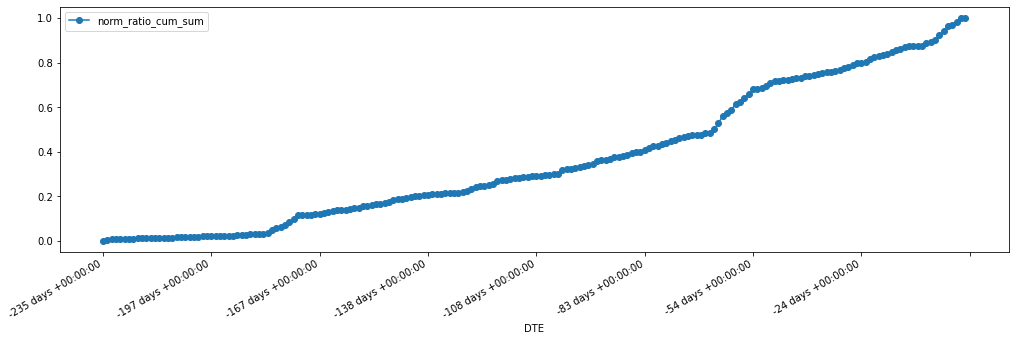

In [22]:
f_df.set_index('DTE')[['norm_ratio_cum_sum']].plot(figsize=(17,5),marker = 'o')

<AxesSubplot:xlabel='DTE'>

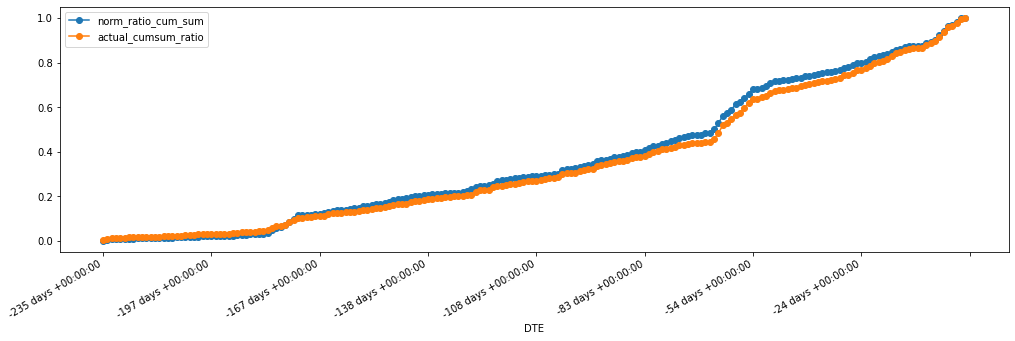

In [23]:
f_df.set_index('DTE')[['norm_ratio_cum_sum','actual_cumsum_ratio']].plot(figsize=(17,5),marker = 'o')

In [24]:
f_df.to_csv("event_data_2430601.csv")